In [1]:
import numpy as np
import scipy
import imageio
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Jpeg Grey Scale Method

https://stackoverflow.com/questions/44793221/python-fractal-box-count-fractal-dimension

Lossy conversion from float64 to uint8. Range [0.0, 254.97449999999998]. Convert image to uint8 prior to saving to suppress this warning.


Text(0, 0.5, 'Box-Counting Dimension')

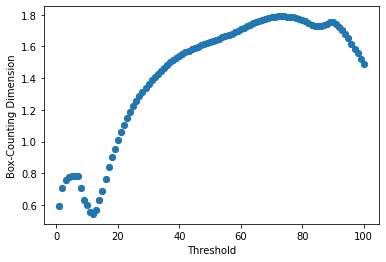

In [3]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def fractal_dimension(Z, threshold=70):
    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])

    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

I = rgb2gray(imageio.imread("Ireland Coastline.jpg"))
imageio.imwrite("Ireland-grey.png", I)
dimensions = []
x = np.arange(1, 101, 1)
for i in x:
    value = fractal_dimension(I, i)
    dimensions.append(value)

plt.scatter(x, dimensions)
plt.xlabel("Threshold")
plt.ylabel("Box-Counting Dimension")

# Using Basemap to plot coastline

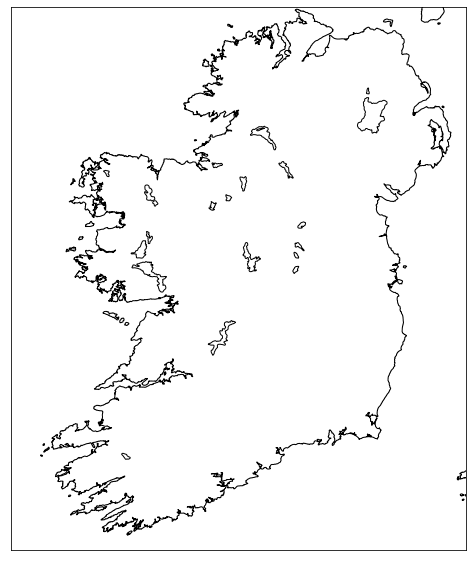

In [4]:
fig = plt.figure(figsize=(10,10))
m = Basemap(
            # Using a mercator projection
            projection='merc',
            resolution='f',
            llcrnrlat=51.3,
            llcrnrlon=-11.,
            urcrnrlat=55.4,
            urcrnrlon=-5.24
)
# draw coastlines.
m.drawcoastlines()
plt.savefig("Ireland Coastline - Basemap.png", transparent=True)
plt.show()

Lossy conversion from float64 to uint8. Range [0.0, 254.97449999999998]. Convert image to uint8 prior to saving to suppress this warning.


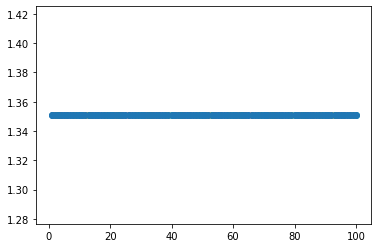

In [5]:
I = rgb2gray(imageio.imread("Ireland Coastline - Basemap.png"))
imageio.imwrite("Ireland Coastline - Basemap - Grey.png", I)
dimensions = []
for i in np.arange(1, 101, 1):
    value = fractal_dimension(I, i)
    plt.scatter(i, value)
    dimensions.append(value)

x = np.arange(1, 101, 1)
plt.scatter(x, dimensions)

In [6]:
I = rgb2gray(imageio.imread("Ireland Coastline - Basemap.png"))
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.350885829543346
